In [22]:
from random import seed
from random import random
from math import exp
import numpy as np
import pandas as pd
import textwrap
import timeit
import binascii
import json
import zlib, base64
import json
import io
import matplotlib.pyplot as plt
import time

In [23]:
# -*- coding: utf-8 -*-
import json

# Make it work for Python 2+3 and with Unicode
import io
try:
    to_unicode = unicode
except NameError:
    to_unicode = str

In [24]:
def addZeros(strr, n): 
    for i in range(n): 
        strr = "0" + strr 
    return strr 

def getXOR(a, b): 
    aLen = len(a) 
    bLen = len(b) 


    if (aLen > bLen): 
        b = addZeros(b, aLen - bLen) 
    elif (bLen > aLen): 
        a = addZeros(a, bLen - aLen) 
 
    lenn = max(aLen, bLen); 

    res = "" 
    for i in range(lenn): 
        if (a[i] == b[i]): 
            res += "0"
        else: 
            res += "1"
    return res 

In [25]:
def text_to_bits(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int(binascii.hexlify(text.encode(encoding, errors)), 16))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

def text_from_bits(bits, encoding='utf-8', errors='surrogatepass'):
    n = int(bits, 2)
    return int2bytes(n).decode(encoding, errors)

def int2bytes(i):
    hex_string = '%x' % i
    n = len(hex_string)
    return binascii.unhexlify(hex_string.zfill(n + (n & 1)))

In [26]:
#initializing the network
def initialize_network(parameters):
    network = list()
    for j in range(1,len(parameters)):
        layer = [{'weights':[random() for i in range(parameters[j-1] + 1)]} for i in range(parameters[j])]
        network.append(layer)
    return network

In [27]:
# Make a prediction with a network
def predict(network, row, encr):
    outputs = forward_propagate(network, row, encr)
    k = [round(i) for i in outputs]
    if encr == 0:
        return k
    else:
        s = ""
        k = list(map(str,k))
        k = s.join(k)
        return k

In [28]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [29]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [30]:
# Forward propagate input to a network output
def forward_propagate(network, row, getEncryption):
    count = 0
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        if count == 1 and getEncryption == 1:
            print("io")
            return new_inputs
        inputs = new_inputs
        count += 1
  
    return inputs

In [75]:
# Update network weights with error
def update_weights(network, row, l_rate):
    
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

def train_network(network, train, l_rate, n_epoch, n_outputs, sno):
    count = 1
    y = []
    x = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            count += 1
            outputs = forward_propagate(network, row, 0)
            expected = row[-1]
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        x.append(count)
        y.append(sum_error)
        if count % 100 == 0:
            print('> epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        count += 1
    f=open('../Test_images/decryptor_design_1bit.txt','a')
    s = "Epochs : " + str(n_epoch) +"\n"
    f.write(s)
    s = "Error : " + str(y[-1]) + "\n"
    f.write(s)
    f.close()
    plt.plot(x, y)
    plt.savefig('../Test_images/decryptor/1bit/decryptor_design_{}.png'.format(sno))
    plt.show()

In [32]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [33]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [34]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    #print(inputs)
    activation = weights[-1]
    for i in range(len(weights)-1):
        #print(i)
        #print(type(weights[i]))
        #print(type(inputs[i]))
        activation += weights[i] * inputs[i]
    return activation

In [35]:
#batch training
# Train a network for a fixed number of epochs
def train_network_batch(network, train, l_rate, n_epoch, n_outputs):
    count = 1
    k = 0
    batch = 2
    for i in range(batch):
        print('> Batch = %d' % (i+1))
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train[k:k+10]:
                count += 1
                outputs = forward_propagate(network, row, 0)
                expected = row[-1]
                sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
                backward_propagate_error(network, expected)
                update_weights(network, row, l_rate)
            if count % 100 == 0:
                print('    epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            count += 1
        k += 10

# Testing begins here for 8 bit output 

In [36]:
# Read JSON file
with open('../datasets/languageDecryptor.json') as data_file:
    dataset = json.load(data_file)

In [38]:
layers_list = list()
for i in range(3):
    l = list()
    l.append([int(i) for i in input().split(" ")])
    l.append(float(input())/2)
    l.append(int(input())*10000)
    layers_list.append(l)

8 18 18 8
2
1
8 18 18 8
1
1
8 18 18 8
0.5
1


> epoch=99, lrate=1.000, error=190.436
> epoch=199, lrate=1.000, error=153.861
> epoch=299, lrate=1.000, error=73.989
> epoch=399, lrate=1.000, error=38.778
> epoch=499, lrate=1.000, error=25.761
> epoch=599, lrate=1.000, error=20.136
> epoch=699, lrate=1.000, error=23.726
> epoch=799, lrate=1.000, error=14.885
> epoch=899, lrate=1.000, error=13.180
> epoch=999, lrate=1.000, error=12.747
> epoch=1099, lrate=1.000, error=12.542
> epoch=1199, lrate=1.000, error=12.431
> epoch=1299, lrate=1.000, error=12.352
> epoch=1399, lrate=1.000, error=12.296
> epoch=1499, lrate=1.000, error=12.256
> epoch=1599, lrate=1.000, error=12.225
> epoch=1699, lrate=1.000, error=12.199
> epoch=1799, lrate=1.000, error=12.176
> epoch=1899, lrate=1.000, error=12.159
> epoch=1999, lrate=1.000, error=12.144
> epoch=2099, lrate=1.000, error=12.129
> epoch=2199, lrate=1.000, error=25.882
> epoch=2299, lrate=1.000, error=11.299
> epoch=2399, lrate=1.000, error=10.307
> epoch=2499, lrate=1.000, error=10.216
> epoch=2

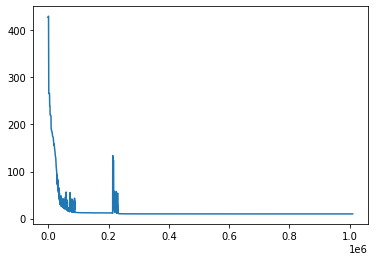

time = 314.6388895130003
9 %
> epoch=99, lrate=0.500, error=223.557
> epoch=199, lrate=0.500, error=174.314
> epoch=299, lrate=0.500, error=158.024
> epoch=399, lrate=0.500, error=92.825
> epoch=499, lrate=0.500, error=46.072
> epoch=599, lrate=0.500, error=17.516
> epoch=699, lrate=0.500, error=13.383
> epoch=799, lrate=0.500, error=11.074
> epoch=899, lrate=0.500, error=9.811
> epoch=999, lrate=0.500, error=9.603
> epoch=1099, lrate=0.500, error=9.480
> epoch=1199, lrate=0.500, error=9.396
> epoch=1299, lrate=0.500, error=9.282
> epoch=1399, lrate=0.500, error=8.300
> epoch=1499, lrate=0.500, error=7.283
> epoch=1599, lrate=0.500, error=7.227
> epoch=1699, lrate=0.500, error=7.198
> epoch=1799, lrate=0.500, error=7.178
> epoch=1899, lrate=0.500, error=7.162
> epoch=1999, lrate=0.500, error=7.149
> epoch=2099, lrate=0.500, error=7.139
> epoch=2199, lrate=0.500, error=7.130
> epoch=2299, lrate=0.500, error=7.122
> epoch=2399, lrate=0.500, error=7.115
> epoch=2499, lrate=0.500, error=7.

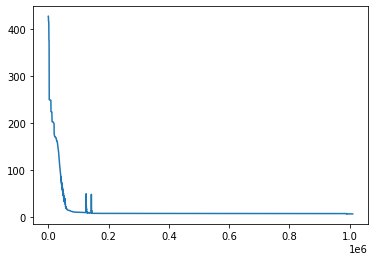

time = 314.13428868100164
6 %
> epoch=99, lrate=0.250, error=235.702
> epoch=199, lrate=0.250, error=213.212
> epoch=299, lrate=0.250, error=191.482
> epoch=399, lrate=0.250, error=190.503
> epoch=499, lrate=0.250, error=184.571
> epoch=599, lrate=0.250, error=152.488
> epoch=699, lrate=0.250, error=132.271
> epoch=799, lrate=0.250, error=107.478
> epoch=899, lrate=0.250, error=82.526
> epoch=999, lrate=0.250, error=63.250
> epoch=1099, lrate=0.250, error=48.046
> epoch=1199, lrate=0.250, error=41.691
> epoch=1299, lrate=0.250, error=35.327
> epoch=1399, lrate=0.250, error=27.591
> epoch=1499, lrate=0.250, error=24.061
> epoch=1599, lrate=0.250, error=29.605
> epoch=1699, lrate=0.250, error=19.853
> epoch=1799, lrate=0.250, error=19.429
> epoch=1899, lrate=0.250, error=18.381
> epoch=1999, lrate=0.250, error=17.434
> epoch=2099, lrate=0.250, error=17.119
> epoch=2199, lrate=0.250, error=16.935
> epoch=2299, lrate=0.250, error=16.803
> epoch=2399, lrate=0.250, error=15.820
> epoch=2499,

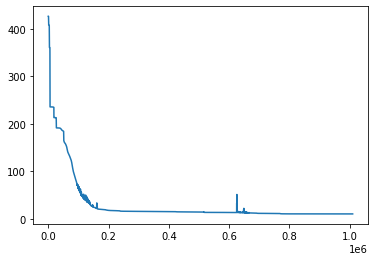

time = 312.92091386700486
10 %


In [40]:
count = 1
for i in layers_list:
    seed(1)
    network = initialize_network(i[0])
    n_inputs = len(dataset) - 1
    n_outputs = len(dataset[-1])
    f=open('../Test_images/decryptor_design_8bit.txt','a')
    s = "{})\n".format(c)
    f.write(s)
    s = "Test name : decryptor_{}_test\n".format(c)
    f.write(s)
    s = "Layers : " + str(i[0]) +"\n"
    f.write(s)
    f.close()
    start = timeit.default_timer()
    train_network(network, dataset, i[1], i[2], n_outputs, count)
    stop = timeit.default_timer()
    print("time = {}".format(stop - start))
    c = 0
    new_dataset = list()
    for b in dataset:
        k = predict(network,b,0)
        s = ""
        k = list(map(str,k))
        k = s.join(k)
        j = b[-1]
        s = ""
        j= list(map(str,j))
        j = s.join(j)
        if(k != j):
            new_dataset.append(b)
            c += 1
    f=open('../Test_images/decryptor_design_8bit.txt','a')
    s = "Decryption error : {} %\n".format(c)
    f.write(s)
    f.write("Time : {}".format(stop - start))
    f.close()
    print(str(c)+" %")
    count += 1

# Testing begins here for 4 bit output

In [42]:
with open('../datasets/languageDecryptor.json') as data_file:
    temp1 = json.load(data_file)

In [43]:
for i in range(100):
    temp1[i][-1] = temp1[i][-1][:4]

In [45]:
layers_list = list()
for i in range(8):
    l = list()
    l.append([int(i) for i in input().split(" ")])
    l.append(float(input())/2)
    l.append(int(input())*10000)
    layers_list.append(l)

8 18 18 4
1
1
8 18 16 4
1
1
8 16 8 4
1
1
8 16 8 4
2
1
8 16 4
1
1
8 8 4
1
1
8 12 4
1
1
8 15 4
1
1


> epoch=99, lrate=0.500, error=69.025
> epoch=199, lrate=0.500, error=69.022
> epoch=299, lrate=0.500, error=69.088
> epoch=399, lrate=0.500, error=69.339
> epoch=499, lrate=0.500, error=47.144
> epoch=599, lrate=0.500, error=46.767
> epoch=699, lrate=0.500, error=44.365
> epoch=799, lrate=0.500, error=45.760
> epoch=899, lrate=0.500, error=46.402
> epoch=999, lrate=0.500, error=47.143
> epoch=1099, lrate=0.500, error=46.457
> epoch=1199, lrate=0.500, error=44.284
> epoch=1299, lrate=0.500, error=43.486
> epoch=1399, lrate=0.500, error=34.780
> epoch=1499, lrate=0.500, error=27.819
> epoch=1599, lrate=0.500, error=19.647
> epoch=1699, lrate=0.500, error=14.817
> epoch=1799, lrate=0.500, error=12.407
> epoch=1899, lrate=0.500, error=8.763
> epoch=1999, lrate=0.500, error=8.304
> epoch=2099, lrate=0.500, error=8.221
> epoch=2199, lrate=0.500, error=8.173
> epoch=2299, lrate=0.500, error=8.142
> epoch=2399, lrate=0.500, error=8.119
> epoch=2499, lrate=0.500, error=8.103
> epoch=2599, lrat

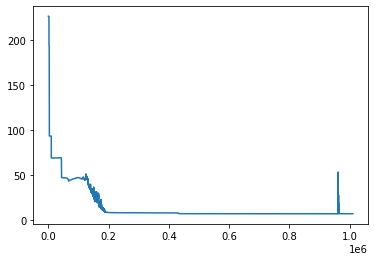

time = 273.68293932000233
100 %
> epoch=99, lrate=0.500, error=47.783
> epoch=199, lrate=0.500, error=47.785
> epoch=299, lrate=0.500, error=48.314
> epoch=399, lrate=0.500, error=48.813
> epoch=499, lrate=0.500, error=47.845
> epoch=599, lrate=0.500, error=47.538
> epoch=699, lrate=0.500, error=47.255
> epoch=799, lrate=0.500, error=47.495
> epoch=899, lrate=0.500, error=45.088
> epoch=999, lrate=0.500, error=31.218
> epoch=1099, lrate=0.500, error=22.167
> epoch=1199, lrate=0.500, error=12.862
> epoch=1299, lrate=0.500, error=6.799
> epoch=1399, lrate=0.500, error=5.187
> epoch=1499, lrate=0.500, error=4.208
> epoch=1599, lrate=0.500, error=4.056
> epoch=1699, lrate=0.500, error=3.986
> epoch=1799, lrate=0.500, error=3.881
> epoch=1899, lrate=0.500, error=3.343
> epoch=1999, lrate=0.500, error=3.202
> epoch=2099, lrate=0.500, error=3.151
> epoch=2199, lrate=0.500, error=3.121
> epoch=2299, lrate=0.500, error=3.102
> epoch=2399, lrate=0.500, error=3.087
> epoch=2499, lrate=0.500, erro

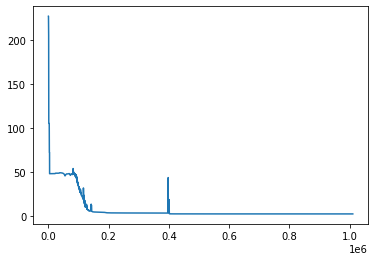

time = 255.5854870289986
100 %
> epoch=99, lrate=0.500, error=54.217
> epoch=199, lrate=0.500, error=54.220
> epoch=299, lrate=0.500, error=55.236
> epoch=399, lrate=0.500, error=58.599
> epoch=499, lrate=0.500, error=52.611
> epoch=599, lrate=0.500, error=40.069
> epoch=699, lrate=0.500, error=20.771
> epoch=799, lrate=0.500, error=11.402
> epoch=899, lrate=0.500, error=7.008
> epoch=999, lrate=0.500, error=4.637
> epoch=1099, lrate=0.500, error=2.771
> epoch=1199, lrate=0.500, error=2.328
> epoch=1299, lrate=0.500, error=2.225
> epoch=1399, lrate=0.500, error=2.170
> epoch=1499, lrate=0.500, error=2.137
> epoch=1599, lrate=0.500, error=2.115
> epoch=1699, lrate=0.500, error=2.099
> epoch=1799, lrate=0.500, error=2.087
> epoch=1899, lrate=0.500, error=2.077
> epoch=1999, lrate=0.500, error=2.070
> epoch=2099, lrate=0.500, error=2.064
> epoch=2199, lrate=0.500, error=2.058
> epoch=2299, lrate=0.500, error=2.054
> epoch=2399, lrate=0.500, error=2.050
> epoch=2499, lrate=0.500, error=2.0

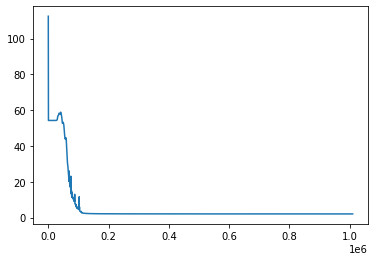

time = 162.64616498300165
100 %
> epoch=99, lrate=1.000, error=47.258
> epoch=199, lrate=1.000, error=49.660
> epoch=299, lrate=1.000, error=50.044
> epoch=399, lrate=1.000, error=48.037
> epoch=499, lrate=1.000, error=25.898
> epoch=599, lrate=1.000, error=10.537
> epoch=699, lrate=1.000, error=6.049
> epoch=799, lrate=1.000, error=5.334
> epoch=899, lrate=1.000, error=5.203
> epoch=999, lrate=1.000, error=5.134
> epoch=1099, lrate=1.000, error=4.160
> epoch=1199, lrate=1.000, error=4.110
> epoch=1299, lrate=1.000, error=4.087
> epoch=1399, lrate=1.000, error=4.073
> epoch=1499, lrate=1.000, error=4.063
> epoch=1599, lrate=1.000, error=4.055
> epoch=1699, lrate=1.000, error=4.050
> epoch=1799, lrate=1.000, error=4.045
> epoch=1899, lrate=1.000, error=4.041
> epoch=1999, lrate=1.000, error=4.038
> epoch=2099, lrate=1.000, error=4.035
> epoch=2199, lrate=1.000, error=4.033
> epoch=2299, lrate=1.000, error=4.031
> epoch=2399, lrate=1.000, error=4.029
> epoch=2499, lrate=1.000, error=4.02

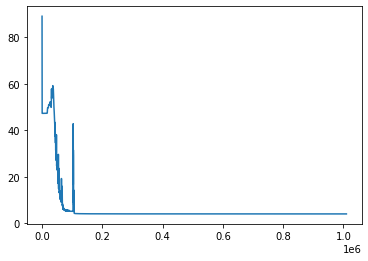

time = 162.21587865900074
100 %
> epoch=99, lrate=0.500, error=49.069
> epoch=199, lrate=0.500, error=26.766
> epoch=299, lrate=0.500, error=13.591
> epoch=399, lrate=0.500, error=7.657
> epoch=499, lrate=0.500, error=4.677
> epoch=599, lrate=0.500, error=3.951
> epoch=699, lrate=0.500, error=3.068
> epoch=799, lrate=0.500, error=2.707
> epoch=899, lrate=0.500, error=2.539
> epoch=999, lrate=0.500, error=2.435
> epoch=1099, lrate=0.500, error=2.365
> epoch=1199, lrate=0.500, error=2.314
> epoch=1299, lrate=0.500, error=2.275
> epoch=1399, lrate=0.500, error=2.244
> epoch=1499, lrate=0.500, error=2.220
> epoch=1599, lrate=0.500, error=2.199
> epoch=1699, lrate=0.500, error=2.183
> epoch=1799, lrate=0.500, error=2.168
> epoch=1899, lrate=0.500, error=2.156
> epoch=1999, lrate=0.500, error=2.145
> epoch=2099, lrate=0.500, error=2.136
> epoch=2199, lrate=0.500, error=2.128
> epoch=2299, lrate=0.500, error=2.120
> epoch=2399, lrate=0.500, error=2.114
> epoch=2499, lrate=0.500, error=2.108
>

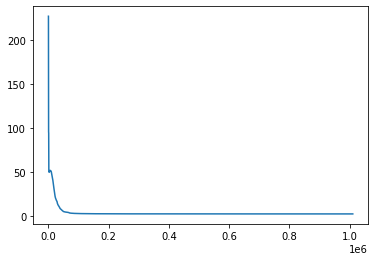

time = 109.79633064399968
100 %
> epoch=99, lrate=0.500, error=48.197
> epoch=199, lrate=0.500, error=38.993
> epoch=299, lrate=0.500, error=32.114
> epoch=399, lrate=0.500, error=27.889
> epoch=499, lrate=0.500, error=25.422
> epoch=599, lrate=0.500, error=23.752
> epoch=699, lrate=0.500, error=21.721
> epoch=799, lrate=0.500, error=20.736
> epoch=899, lrate=0.500, error=19.063
> epoch=999, lrate=0.500, error=18.025
> epoch=1099, lrate=0.500, error=17.410
> epoch=1199, lrate=0.500, error=17.036
> epoch=1299, lrate=0.500, error=16.547
> epoch=1399, lrate=0.500, error=16.210
> epoch=1499, lrate=0.500, error=15.860
> epoch=1599, lrate=0.500, error=15.621
> epoch=1699, lrate=0.500, error=15.596
> epoch=1799, lrate=0.500, error=15.250
> epoch=1899, lrate=0.500, error=15.196
> epoch=1999, lrate=0.500, error=15.157
> epoch=2099, lrate=0.500, error=14.930
> epoch=2199, lrate=0.500, error=15.364
> epoch=2299, lrate=0.500, error=15.273
> epoch=2399, lrate=0.500, error=15.210
> epoch=2499, lrate

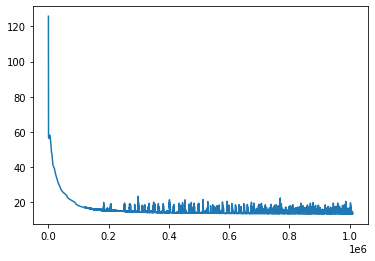

time = 67.04625746600504
100 %
> epoch=99, lrate=0.500, error=46.990
> epoch=199, lrate=0.500, error=29.238
> epoch=299, lrate=0.500, error=21.779
> epoch=399, lrate=0.500, error=17.764
> epoch=499, lrate=0.500, error=14.759
> epoch=599, lrate=0.500, error=12.632
> epoch=699, lrate=0.500, error=11.537
> epoch=799, lrate=0.500, error=11.081
> epoch=899, lrate=0.500, error=10.825
> epoch=999, lrate=0.500, error=9.846
> epoch=1099, lrate=0.500, error=9.650
> epoch=1199, lrate=0.500, error=9.540
> epoch=1299, lrate=0.500, error=9.464
> epoch=1399, lrate=0.500, error=9.406
> epoch=1499, lrate=0.500, error=9.361
> epoch=1599, lrate=0.500, error=9.325
> epoch=1699, lrate=0.500, error=9.295
> epoch=1799, lrate=0.500, error=9.271
> epoch=1899, lrate=0.500, error=9.250
> epoch=1999, lrate=0.500, error=9.232
> epoch=2099, lrate=0.500, error=9.216
> epoch=2199, lrate=0.500, error=9.202
> epoch=2299, lrate=0.500, error=9.190
> epoch=2399, lrate=0.500, error=9.179
> epoch=2499, lrate=0.500, error=9.

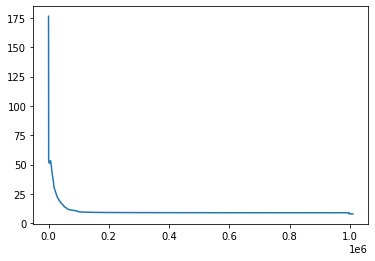

time = 87.85233807599434
100 %
> epoch=99, lrate=0.500, error=45.186
> epoch=199, lrate=0.500, error=24.524
> epoch=299, lrate=0.500, error=14.114
> epoch=399, lrate=0.500, error=9.225
> epoch=499, lrate=0.500, error=7.478
> epoch=599, lrate=0.500, error=6.951
> epoch=699, lrate=0.500, error=6.702
> epoch=799, lrate=0.500, error=6.557
> epoch=899, lrate=0.500, error=6.461
> epoch=999, lrate=0.500, error=6.394
> epoch=1099, lrate=0.500, error=6.343
> epoch=1199, lrate=0.500, error=6.305
> epoch=1299, lrate=0.500, error=6.274
> epoch=1399, lrate=0.500, error=6.249
> epoch=1499, lrate=0.500, error=6.228
> epoch=1599, lrate=0.500, error=6.211
> epoch=1699, lrate=0.500, error=6.196
> epoch=1799, lrate=0.500, error=6.183
> epoch=1899, lrate=0.500, error=6.171
> epoch=1999, lrate=0.500, error=6.161
> epoch=2099, lrate=0.500, error=6.152
> epoch=2199, lrate=0.500, error=6.144
> epoch=2299, lrate=0.500, error=6.137
> epoch=2399, lrate=0.500, error=6.130
> epoch=2499, lrate=0.500, error=6.124
> 

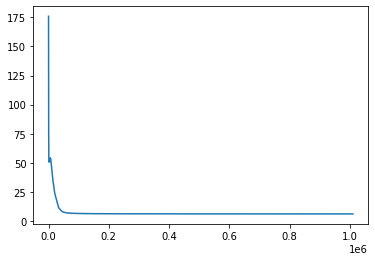

time = 104.57996940000157
100 %


In [48]:
count = 1
for i in layers_list:
    seed(1)
    network = initialize_network(i[0])
    n_inputs = len(temp1) - 1
    n_outputs = len(temp1[-1])
    f=open('../Test_images/decryptor_design_4bit.txt','a')
    s = "{})\n".format(c)
    f.write(s)
    s = "Test name : decryptor_{}_test\n".format(count)
    f.write(s)
    s = "Layers : " + str(i[0]) +"\n"
    f.write(s)
    f.close()
    start = timeit.default_timer()
    train_network(network, temp1, i[1], i[2], n_outputs, count)
    stop = timeit.default_timer()
    print("time = {}".format(stop - start))
    c = 0
    new_dataset = list()
    for b in dataset:
        k = predict(network,b,0)
        s = ""
        k = list(map(str,k))
        k = s.join(k)
        j = b[-1]
        s = ""
        j= list(map(str,j))
        j = s.join(j)
        if(k != j):
            new_dataset.append(b)
            c += 1
    f=open('../Test_images/decryptor_design_4bit.txt','a')
    f.write("Time : {}".format(stop - start))
    f.close()
    print(str(c)+" %")
    count += 1

# Testing begins here for 2 bit output

In [67]:
with open('../Project/data/languageDecryptor.json') as data_file:
    temp1 = json.load(data_file)
    
with open('../Project/data/languageDecryptor.json') as data_file:
    temp2 = json.load(data_file)
    
with open('../Project/data/languageDecryptor.json') as data_file:
    temp3 = json.load(data_file)


In [68]:
for i in range(100):
    temp1[i][-1] = temp1[i][-1][:2]
    temp2[i][-1] = temp2[i][-1][2:4]
    temp3[i][-1] = temp3[i][-1][4:6]

In [60]:
layers_list = list()
for i in range(3):
    l = list()
    l.append([int(i) for i in input().split(" ")])
    l.append(float(input())/2)
    l.append(int(input())*10000)
    layers_list.append(l)

8 9 7 2
2
1
8 9 7 2
2
3
8 10 6 2
2
3


> epoch=99, lrate=1.000, error=47.782
> epoch=199, lrate=1.000, error=29.489
> epoch=299, lrate=1.000, error=17.290
> epoch=399, lrate=1.000, error=11.760
> epoch=499, lrate=1.000, error=7.653
> epoch=599, lrate=1.000, error=7.402
> epoch=699, lrate=1.000, error=6.179
> epoch=799, lrate=1.000, error=5.963
> epoch=899, lrate=1.000, error=5.884
> epoch=999, lrate=1.000, error=5.847
> epoch=1099, lrate=1.000, error=5.824
> epoch=1199, lrate=1.000, error=5.808
> epoch=1299, lrate=1.000, error=5.797
> epoch=1399, lrate=1.000, error=5.788
> epoch=1499, lrate=1.000, error=5.781
> epoch=1599, lrate=1.000, error=5.776
> epoch=1699, lrate=1.000, error=5.772
> epoch=1799, lrate=1.000, error=5.768
> epoch=1899, lrate=1.000, error=5.765
> epoch=1999, lrate=1.000, error=5.762
> epoch=2099, lrate=1.000, error=5.760
> epoch=2199, lrate=1.000, error=5.758
> epoch=2299, lrate=1.000, error=5.756
> epoch=2399, lrate=1.000, error=5.755
> epoch=2499, lrate=1.000, error=5.753
> epoch=2599, lrate=1.000, error

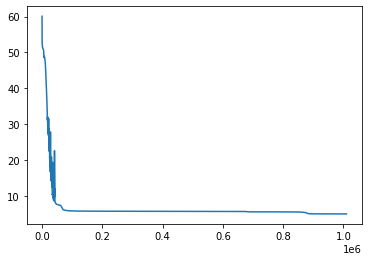

time = 98.12906700099848
100 %
> epoch=99, lrate=1.000, error=47.782
> epoch=199, lrate=1.000, error=29.489
> epoch=299, lrate=1.000, error=17.290
> epoch=399, lrate=1.000, error=11.760
> epoch=499, lrate=1.000, error=7.653
> epoch=599, lrate=1.000, error=7.402
> epoch=699, lrate=1.000, error=6.179
> epoch=799, lrate=1.000, error=5.963
> epoch=899, lrate=1.000, error=5.884
> epoch=999, lrate=1.000, error=5.847
> epoch=1099, lrate=1.000, error=5.824
> epoch=1199, lrate=1.000, error=5.808
> epoch=1299, lrate=1.000, error=5.797
> epoch=1399, lrate=1.000, error=5.788
> epoch=1499, lrate=1.000, error=5.781
> epoch=1599, lrate=1.000, error=5.776
> epoch=1699, lrate=1.000, error=5.772
> epoch=1799, lrate=1.000, error=5.768
> epoch=1899, lrate=1.000, error=5.765
> epoch=1999, lrate=1.000, error=5.762
> epoch=2099, lrate=1.000, error=5.760
> epoch=2199, lrate=1.000, error=5.758
> epoch=2299, lrate=1.000, error=5.756
> epoch=2399, lrate=1.000, error=5.755
> epoch=2499, lrate=1.000, error=5.753
>

> epoch=20799, lrate=1.000, error=5.002
> epoch=20899, lrate=1.000, error=5.002
> epoch=20999, lrate=1.000, error=5.002
> epoch=21099, lrate=1.000, error=5.002
> epoch=21199, lrate=1.000, error=5.002
> epoch=21299, lrate=1.000, error=5.002
> epoch=21399, lrate=1.000, error=5.002
> epoch=21499, lrate=1.000, error=5.002
> epoch=21599, lrate=1.000, error=5.002
> epoch=21699, lrate=1.000, error=5.002
> epoch=21799, lrate=1.000, error=5.002
> epoch=21899, lrate=1.000, error=5.002
> epoch=21999, lrate=1.000, error=5.002
> epoch=22099, lrate=1.000, error=5.002
> epoch=22199, lrate=1.000, error=5.002
> epoch=22299, lrate=1.000, error=5.002
> epoch=22399, lrate=1.000, error=5.002
> epoch=22499, lrate=1.000, error=5.002
> epoch=22599, lrate=1.000, error=5.002
> epoch=22699, lrate=1.000, error=5.002
> epoch=22799, lrate=1.000, error=5.002
> epoch=22899, lrate=1.000, error=5.002
> epoch=22999, lrate=1.000, error=5.002
> epoch=23099, lrate=1.000, error=5.002
> epoch=23199, lrate=1.000, error=5.002


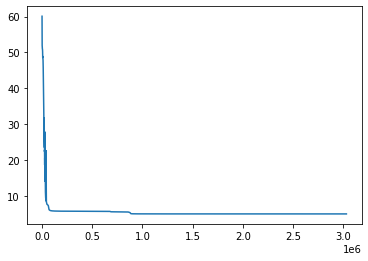

time = 293.78510403700056
100 %
> epoch=99, lrate=1.000, error=49.038
> epoch=199, lrate=1.000, error=33.575
> epoch=299, lrate=1.000, error=17.403
> epoch=399, lrate=1.000, error=14.431
> epoch=499, lrate=1.000, error=10.991
> epoch=599, lrate=1.000, error=9.953
> epoch=699, lrate=1.000, error=9.811
> epoch=799, lrate=1.000, error=9.184
> epoch=899, lrate=1.000, error=8.126
> epoch=999, lrate=1.000, error=8.068
> epoch=1099, lrate=1.000, error=8.049
> epoch=1199, lrate=1.000, error=8.038
> epoch=1299, lrate=1.000, error=8.032
> epoch=1399, lrate=1.000, error=8.027
> epoch=1499, lrate=1.000, error=8.024
> epoch=1599, lrate=1.000, error=8.021
> epoch=1699, lrate=1.000, error=8.019
> epoch=1799, lrate=1.000, error=8.017
> epoch=1899, lrate=1.000, error=8.016
> epoch=1999, lrate=1.000, error=8.015
> epoch=2099, lrate=1.000, error=8.014
> epoch=2199, lrate=1.000, error=8.013
> epoch=2299, lrate=1.000, error=8.012
> epoch=2399, lrate=1.000, error=8.011
> epoch=2499, lrate=1.000, error=8.011

> epoch=20799, lrate=1.000, error=8.001
> epoch=20899, lrate=1.000, error=8.001
> epoch=20999, lrate=1.000, error=8.001
> epoch=21099, lrate=1.000, error=8.001
> epoch=21199, lrate=1.000, error=8.001
> epoch=21299, lrate=1.000, error=8.001
> epoch=21399, lrate=1.000, error=8.001
> epoch=21499, lrate=1.000, error=8.001
> epoch=21599, lrate=1.000, error=8.001
> epoch=21699, lrate=1.000, error=8.001
> epoch=21799, lrate=1.000, error=8.001
> epoch=21899, lrate=1.000, error=8.001
> epoch=21999, lrate=1.000, error=8.001
> epoch=22099, lrate=1.000, error=8.001
> epoch=22199, lrate=1.000, error=8.001
> epoch=22299, lrate=1.000, error=8.001
> epoch=22399, lrate=1.000, error=8.001
> epoch=22499, lrate=1.000, error=8.001
> epoch=22599, lrate=1.000, error=8.001
> epoch=22699, lrate=1.000, error=8.001
> epoch=22799, lrate=1.000, error=8.001
> epoch=22899, lrate=1.000, error=8.001
> epoch=22999, lrate=1.000, error=8.001
> epoch=23099, lrate=1.000, error=8.001
> epoch=23199, lrate=1.000, error=8.001


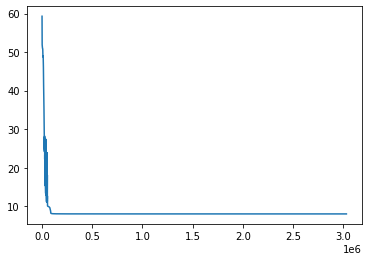

time = 296.9883034190061
100 %


In [70]:
count = 1
for i in layers_list:
    seed(1)
    network = initialize_network(i[0])
    n_inputs = len(temp3) - 1
    n_outputs = len(temp3[-1])
    f=open('../Test_images/decryptor_design_2bit_nw3.txt','a')
    s = "{})\n".format(c)
    f.write(s)
    s = "Test name : decryptor_{}_test\n".format(count)
    f.write(s)
    s = "Layers : " + str(i[0]) +"\n"
    f.write(s)
    f.close()
    start = timeit.default_timer()
    train_network(network, temp3, i[1], i[2], n_outputs, count)
    stop = timeit.default_timer()
    print("time = {}".format(stop - start))
    c = 0
    new_dataset = list()
    for b in dataset:
        k = predict(network,b,0)
        s = ""
        k = list(map(str,k))
        k = s.join(k)
        j = b[-1]
        s = ""
        j= list(map(str,j))
        j = s.join(j)
        if(k != j):
            new_dataset.append(b)
            c += 1
    f=open('../Test_images/decryptor_design_2bit_nw3.txt','a')

    f.write("Time : {}".format(stop - start))
    f.close()
    print(str(c)+" %")
    count += 1

# Testing begins here for 2 bit output

In [73]:
with open('../Project/data/languageDecryptor.json') as data_file:
    temp1 = json.load(data_file)
    
with open('../Project/data/languageDecryptor.json') as data_file:
    temp2 = json.load(data_file)
    
with open('../Project/data/languageDecryptor.json') as data_file:
    temp3 = json.load(data_file)
    
with open('../Project/data/languageDecryptor.json') as data_file:
    temp4 = json.load(data_file)
    
with open('../Project/data/languageDecryptor.json') as data_file:
    temp5 = json.load(data_file)
    
with open('../Project/data/languageDecryptor.json') as data_file:
    temp6 = json.load(data_file)
    
with open('../Project/data/languageDecryptor.json') as data_file:
    temp7 = json.load(data_file)

In [74]:
temp = list()
for i in range(100):
    temp1[i][-1] = temp1[i][-1][1:2]
    temp2[i][-1] = temp2[i][-1][2:3]
    temp3[i][-1] = temp3[i][-1][3:4]
    temp4[i][-1] = temp4[i][-1][4:5]
    temp5[i][-1] = temp5[i][-1][5:6]
    temp6[i][-1] = temp6[i][-1][6:7]
    temp7[i][-1] = temp7[i][-1][7:]
    temp.append(temp1)
    temp.append(temp2)
    temp.append(temp3)
    temp.append(temp4)
    temp.append(temp5)
    temp.append(temp6)
    temp.append(temp7)
    

In [77]:
layers_list = list()
for i in range(7):
    l = list()
    l.append([int(i) for i in input().split(" ")])
    l.append(float(input())/2)
    l.append(int(input())*10000)
    layers_list.append(l)

8 9 7 1
2
1
8 9 7 1
2
1
8 9 7 1
2
1
8 10 9 1
2
1
8 10 9 1
2
1
8 9 3 1
2
1
8 10 9 1
2
1


> epoch=99, lrate=1.000, error=16.363
> epoch=199, lrate=1.000, error=15.907
> epoch=299, lrate=1.000, error=9.385
> epoch=399, lrate=1.000, error=4.109
> epoch=499, lrate=1.000, error=4.003
> epoch=599, lrate=1.000, error=3.007
> epoch=699, lrate=1.000, error=3.000
> epoch=799, lrate=1.000, error=2.984
> epoch=899, lrate=1.000, error=1.690
> epoch=999, lrate=1.000, error=1.011
> epoch=1099, lrate=1.000, error=1.006
> epoch=1199, lrate=1.000, error=1.004
> epoch=1299, lrate=1.000, error=1.003
> epoch=1399, lrate=1.000, error=1.002
> epoch=1499, lrate=1.000, error=1.002
> epoch=1599, lrate=1.000, error=1.002
> epoch=1699, lrate=1.000, error=1.001
> epoch=1799, lrate=1.000, error=1.001
> epoch=1899, lrate=1.000, error=1.001
> epoch=1999, lrate=1.000, error=1.001
> epoch=2099, lrate=1.000, error=1.001
> epoch=2199, lrate=1.000, error=1.001
> epoch=2299, lrate=1.000, error=1.001
> epoch=2399, lrate=1.000, error=1.001
> epoch=2499, lrate=1.000, error=1.001
> epoch=2599, lrate=1.000, error=1

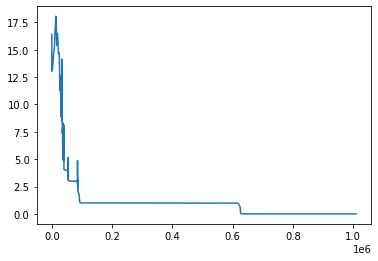

time = 93.58787908100203
100 %
> epoch=99, lrate=1.000, error=19.680
> epoch=199, lrate=1.000, error=19.403
> epoch=299, lrate=1.000, error=12.133
> epoch=399, lrate=1.000, error=9.185
> epoch=499, lrate=1.000, error=3.387
> epoch=599, lrate=1.000, error=1.040
> epoch=699, lrate=1.000, error=0.948
> epoch=799, lrate=1.000, error=0.628
> epoch=899, lrate=1.000, error=0.043
> epoch=999, lrate=1.000, error=0.025
> epoch=1099, lrate=1.000, error=0.017
> epoch=1199, lrate=1.000, error=0.014
> epoch=1299, lrate=1.000, error=0.011
> epoch=1399, lrate=1.000, error=0.009
> epoch=1499, lrate=1.000, error=0.008
> epoch=1599, lrate=1.000, error=0.007
> epoch=1699, lrate=1.000, error=0.007
> epoch=1799, lrate=1.000, error=0.006
> epoch=1899, lrate=1.000, error=0.005
> epoch=1999, lrate=1.000, error=0.005
> epoch=2099, lrate=1.000, error=0.005
> epoch=2199, lrate=1.000, error=0.004
> epoch=2299, lrate=1.000, error=0.004
> epoch=2399, lrate=1.000, error=0.004
> epoch=2499, lrate=1.000, error=0.004
> 

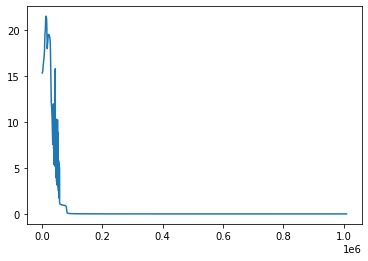

time = 92.62139428799856
100 %
> epoch=99, lrate=1.000, error=21.356
> epoch=199, lrate=1.000, error=18.874
> epoch=299, lrate=1.000, error=10.694
> epoch=399, lrate=1.000, error=6.129
> epoch=499, lrate=1.000, error=3.984
> epoch=599, lrate=1.000, error=3.165
> epoch=699, lrate=1.000, error=2.852
> epoch=799, lrate=1.000, error=0.921
> epoch=899, lrate=1.000, error=0.022
> epoch=999, lrate=1.000, error=0.012
> epoch=1099, lrate=1.000, error=0.008
> epoch=1199, lrate=1.000, error=0.006
> epoch=1299, lrate=1.000, error=0.005
> epoch=1399, lrate=1.000, error=0.004
> epoch=1499, lrate=1.000, error=0.004
> epoch=1599, lrate=1.000, error=0.003
> epoch=1699, lrate=1.000, error=0.003
> epoch=1799, lrate=1.000, error=0.003
> epoch=1899, lrate=1.000, error=0.002
> epoch=1999, lrate=1.000, error=0.002
> epoch=2099, lrate=1.000, error=0.002
> epoch=2199, lrate=1.000, error=0.002
> epoch=2299, lrate=1.000, error=0.002
> epoch=2399, lrate=1.000, error=0.002
> epoch=2499, lrate=1.000, error=0.002
> 

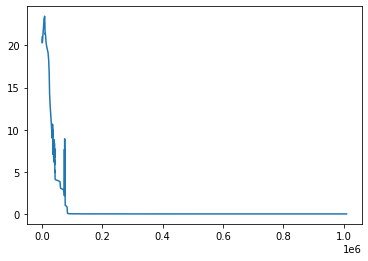

time = 95.0325535919983
100 %
> epoch=99, lrate=1.000, error=23.045
> epoch=199, lrate=1.000, error=11.853
> epoch=299, lrate=1.000, error=1.045
> epoch=399, lrate=1.000, error=1.011
> epoch=499, lrate=1.000, error=1.007
> epoch=599, lrate=1.000, error=1.005
> epoch=699, lrate=1.000, error=1.004
> epoch=799, lrate=1.000, error=1.003
> epoch=899, lrate=1.000, error=1.003
> epoch=999, lrate=1.000, error=1.002
> epoch=1099, lrate=1.000, error=1.002
> epoch=1199, lrate=1.000, error=1.002
> epoch=1299, lrate=1.000, error=1.002
> epoch=1399, lrate=1.000, error=1.002
> epoch=1499, lrate=1.000, error=1.001
> epoch=1599, lrate=1.000, error=1.001
> epoch=1699, lrate=1.000, error=1.001
> epoch=1799, lrate=1.000, error=1.001
> epoch=1899, lrate=1.000, error=1.001
> epoch=1999, lrate=1.000, error=1.001
> epoch=2099, lrate=1.000, error=1.001
> epoch=2199, lrate=1.000, error=1.001
> epoch=2299, lrate=1.000, error=1.001
> epoch=2399, lrate=1.000, error=1.001
> epoch=2499, lrate=1.000, error=1.001
> ep

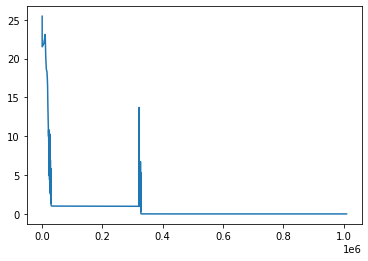

time = 110.43629813900043
100 %
> epoch=99, lrate=1.000, error=26.318
> epoch=199, lrate=1.000, error=26.279
> epoch=299, lrate=1.000, error=23.618
> epoch=399, lrate=1.000, error=17.774
> epoch=499, lrate=1.000, error=12.118
> epoch=599, lrate=1.000, error=9.945
> epoch=699, lrate=1.000, error=3.111
> epoch=799, lrate=1.000, error=1.018
> epoch=899, lrate=1.000, error=0.984
> epoch=999, lrate=1.000, error=0.968
> epoch=1099, lrate=1.000, error=0.038
> epoch=1199, lrate=1.000, error=0.019
> epoch=1299, lrate=1.000, error=0.013
> epoch=1399, lrate=1.000, error=0.010
> epoch=1499, lrate=1.000, error=0.008
> epoch=1599, lrate=1.000, error=0.007
> epoch=1699, lrate=1.000, error=0.006
> epoch=1799, lrate=1.000, error=0.005
> epoch=1899, lrate=1.000, error=0.005
> epoch=1999, lrate=1.000, error=0.004
> epoch=2099, lrate=1.000, error=0.004
> epoch=2199, lrate=1.000, error=0.004
> epoch=2299, lrate=1.000, error=0.003
> epoch=2399, lrate=1.000, error=0.003
> epoch=2499, lrate=1.000, error=0.003

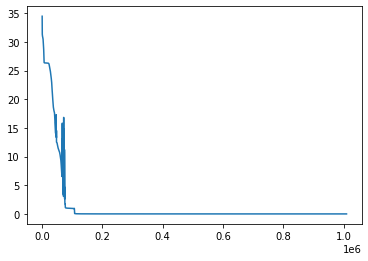

time = 110.2954682960044
100 %
> epoch=99, lrate=1.000, error=26.497
> epoch=199, lrate=1.000, error=19.720
> epoch=299, lrate=1.000, error=12.345
> epoch=399, lrate=1.000, error=3.989
> epoch=499, lrate=1.000, error=3.968
> epoch=599, lrate=1.000, error=3.951
> epoch=699, lrate=1.000, error=3.930
> epoch=799, lrate=1.000, error=2.955
> epoch=899, lrate=1.000, error=2.012
> epoch=999, lrate=1.000, error=1.995
> epoch=1099, lrate=1.000, error=1.987
> epoch=1199, lrate=1.000, error=1.982
> epoch=1299, lrate=1.000, error=1.977
> epoch=1399, lrate=1.000, error=1.973
> epoch=1499, lrate=1.000, error=1.969
> epoch=1599, lrate=1.000, error=1.965
> epoch=1699, lrate=1.000, error=1.962
> epoch=1799, lrate=1.000, error=1.958
> epoch=1899, lrate=1.000, error=1.951
> epoch=1999, lrate=1.000, error=1.945
> epoch=2099, lrate=1.000, error=1.939
> epoch=2199, lrate=1.000, error=1.930
> epoch=2299, lrate=1.000, error=1.915
> epoch=2399, lrate=1.000, error=1.887
> epoch=2499, lrate=1.000, error=1.862
> 

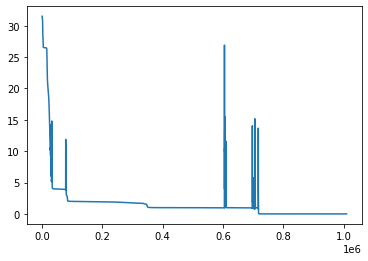

time = 69.75215928500256
100 %
> epoch=99, lrate=1.000, error=25.324
> epoch=199, lrate=1.000, error=20.318
> epoch=299, lrate=1.000, error=6.957
> epoch=399, lrate=1.000, error=3.583
> epoch=499, lrate=1.000, error=2.834
> epoch=599, lrate=1.000, error=2.718
> epoch=699, lrate=1.000, error=2.583
> epoch=799, lrate=1.000, error=2.328
> epoch=899, lrate=1.000, error=0.044
> epoch=999, lrate=1.000, error=0.019
> epoch=1099, lrate=1.000, error=0.011
> epoch=1199, lrate=1.000, error=0.008
> epoch=1299, lrate=1.000, error=0.006
> epoch=1399, lrate=1.000, error=0.004
> epoch=1499, lrate=1.000, error=0.004
> epoch=1599, lrate=1.000, error=0.003
> epoch=1699, lrate=1.000, error=0.003
> epoch=1799, lrate=1.000, error=0.002
> epoch=1899, lrate=1.000, error=0.002
> epoch=1999, lrate=1.000, error=0.002
> epoch=2099, lrate=1.000, error=0.002
> epoch=2199, lrate=1.000, error=0.002
> epoch=2299, lrate=1.000, error=0.001
> epoch=2399, lrate=1.000, error=0.001
> epoch=2499, lrate=1.000, error=0.001
> e

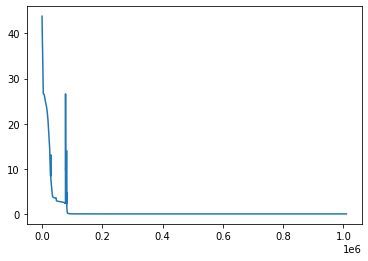

time = 110.53718047899747
100 %


In [79]:
count = 1
for i in range(7):
    seed(1)
    network = initialize_network(layers_list[i][0])
    n_inputs = len(temp[i]) - 1
    n_outputs = len(temp[i][-1])
    f=open('../Test_images/decryptor_design_1bit.txt','a')
    s = "{})\n".format(c)
    f.write(s)
    s = "Test name : decryptor_{}_test\n".format(count)
    f.write(s)
    s = "Layers : " + str(layers_list[i][0]) +"\n"
    f.write(s)
    f.close()
    start = timeit.default_timer()
    train_network(network, temp[i], layers_list[i][1], layers_list[i][2], n_outputs, count)
    stop = timeit.default_timer()
    print("time = {}".format(stop - start))
    c = 0
    new_dataset = list()
    for b in dataset:
        k = predict(network,b,0)
        s = ""
        k = list(map(str,k))
        k = s.join(k)
        j = b[-1]
        s = ""
        j= list(map(str,j))
        j = s.join(j)
        if(k != j):
            new_dataset.append(b)
            c += 1
    f=open('../Test_images/decryptor_design_1bit.txt','a')

    f.write("Time : {}".format(stop - start))
    f.close()
    print(str(c)+" %")
    count += 1

In [87]:
"Welcome to codetantra".replace("codetantra","home")

'Welcome to home'

In [92]:
print([i for i in range(1)][0])

0


In [97]:
print([i for in []][0])

AttributeError: 'str' object has no attribute 'truncate'

In [101]:
print([(i if i == "to") for i in "welcome to codetantra".split(" ")])

SyntaxError: invalid syntax (<ipython-input-101-c92c3837f4ef>, line 1)

In [120]:
for i in (list(i for i in [("home" if i == "codetantra" else i) for i in "welcome to codetantra".split(" ")])):
    print(i,end=" ")

welcome to home 

TypeError: 'i' is an invalid keyword argument for this function